In [ ]:
import numpy as np, scipy as sc, matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [ ]:
n=500 #registros de datos
p=2 # caracteristicas a cerca de los datos
# buscar informacion acerca de numpy, scipy y matplot

x,y= make_circles(n_samples=n, factor=.49, noise=.07)

y=y[:,np.newaxis]
# asignando variables de entrada y salida x e y el n numero de valores de datos, el factor de dispersion
# y el ruido, el vector y generado tomara valores vinarios los cuales representaran si pertenece a uno u otro circulo

# def circulo mayor, c determina el color de cada uno de los circulos
plt.scatter(x[y[:,0]==0,0], x[y[:,0]==0,1], c="skyblue")
plt.axis("equal")
# def del circulo menor, este circulo sera def por una n lista de puntos con coordenadas
# x y
plt.scatter(x[y[:,0]==1,0],x[y[:,0]==1,1],c="orange") 
plt.show()


In [ ]:
# clase de capa de Red
class neural_layer():
    
    def __init__(self,n_conn,n_neur,act_f):
        self.act_f=act_f
        self.b =np.random.rand(1, n_neur)*2-1 # generar n random entre [-1:1]
        self.w = np.random.rand(n_conn, n_neur)*2-1 # generar n random entre [-1:1]

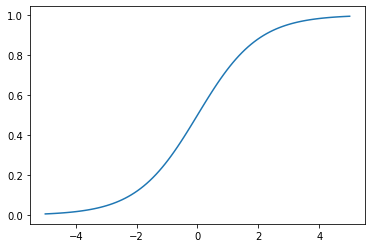

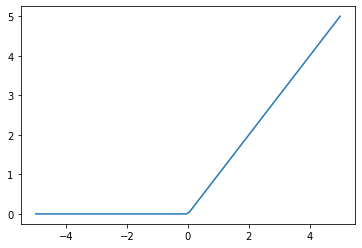

In [ ]:
# funciones de activacion

#funcion sigmoide
sigm= (lambda x: 1/(1+np.e**(-x)),
lambda x: x*(1-x))
 # Funcion anonima reservada en python esta reservada en la palabra Lambda

x1= np.linspace(-5,5,100) # vector que tiene valores de [-5:5] y posee 100 valores
fx=plt.plot(x1,sigm[0](x1))
plt.show(fx)


# Funcion Relu

relu= lambda x:np.maximum(0,x)
x1= np.linspace(-5,5,100)
fx0=plt.plot(x1,relu(x1))
plt.show(fx0)

In [ ]:
# generacion layers
l0=neural_layer(p,4,sigm)
l1=neural_layer(4,8,sigm)

#topologia de la red
topology=[p,4,8,16,8,4,1] # la ultima capa es una sola neurona ya que el resultado que se busca es binario, "0,1"

def create_nn(topology ,act_f):
   
    nn=[] # estructura de datos que sontendra todos los layer de nuestra red

    for l,layer in enumerate(topology[:-1]): # la funcion enumerate me da el indice del vector y del objeto recorrido con python
        nn.append(neural_layer(topology[l],topology[l+1],act_f))
    return nn

create_nn(topology, sigm)

In [ ]:
neural_net=create_nn(topology,sigm)

# Ejecucion de todo el codigo encargado de entrenar la nn
l2_cost= (lambda Yp,Yr: np.mean((Yp-Yr)**2), 
lambda Yp,Yr: (Yp-Yr))

def train(neural_net,x,y,l2_cost,lr=.5, train=True):# lr es el ratio de aprendizaje y es la dif del gradiente para que el 
    
    out=[None,x] # para poder alamacenar las salidas de la red en cada neurona
    
    #forward pass
    for l,layer in enumerate(neural_net):
        z=out[-1][1] @ neural_net[l].w + neural_net[l].b
        a=neural_net[l].act_f[0](z)
        out.append((z,a))
    
    print(out[-1][1])
    print(l2_cost[0](out[-1][1],y))

    if train:
      # Backward pass
      delta=[]
      for l in reversed(range(0,len(neural_net))):
          z=out[l+2][0]# elemento a mostrar y la columna del vector
          a=out[l+2][1]
          print(a.shape)
          
          if l== len(neural_net)-1:
            delta.insert(0,l2_cost[1](a,y)*neural_net[l].act_f[1](a))
          else:
            delta.insert(0,delta[0]@_w*neural_net[l].act_f[1](a))
          _w= neural_net[l].w

      # Gradient descent
          neural_net[l].b=neural_net[l].b-np.mean(delta[0],axis=0,keepdims=True) * lr

          neural_net[l].w=neural_net[l].w-out[l][1].T@delta[0]* lr
      
      return out [-1][1]

train(neural_net,x,y,l2_cost,.5)

[[0.46762251]]
0.2510483019536268
(1, 1)


ValueError: ignored